<a href="https://colab.research.google.com/github/ohsono/stats414/blob/main/stat414_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#### This is an optional code block                                  ####
#### please execute it once or none if you have the dataset uploaded ####

import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("xiaojiu1414/digix-global-ai-challenge")
# Print the current working directory
train_data=path+"/train/"
print("Current working directory: {0}".format(os.getcwd()))
# Change the current working directory
os.chdir(train_data)
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /root/.cache/kagglehub/datasets/xiaojiu1414/digix-global-ai-challenge/versions/1/train
Current working directory: /root/.cache/kagglehub/datasets/xiaojiu1414/digix-global-ai-challenge/versions/1/train


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_score,recall_score,f1_score
from IPython.display import display
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)
if path is None:
  %cd /content/sample_data/
  !ls

In [ ]:
train_ads = pd.read_csv('train_data_ads.csv')
train_ads.head()#.T

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#pie chart of labels to show imbalance; many more 0s than 1s
px.pie(train_ads.label.value_counts().reset_index(), values='count', names='label')

In [ ]:

train_ads.columns

Index(['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'city',
       'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name',
       'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 'site_id', 'spread_app_id',
       'hispace_app_tags', 'app_second_class', 'app_score',
       'ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
       'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003',
       'pt_d', 'u_newsCatInterestsST', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')

In [ ]:
print(train_ads.groupby('gender')['ad_click_count'].mean())

# Cross-tab with another feature (e.g., city)
print(pd.crosstab(train_ads['gender'], train_ads['city']))

KeyError: 'Column not found: ad_click_count'

In [ ]:
# Check for null values in each column
missing_values = train_ads.isnull().sum()
# Display only columns with missing values
missing_values_gt_0 = missing_values[missing_values > 0]
print(missing_values_gt_0)

ad_close_list_v002      1
ad_close_list_v003      1
pt_d                    1
u_newsCatInterestsST    1
u_refreshTimes          1
u_feedLifeCycle         1
dtype: int64


In [ ]:
new_var = train_ads.value_counts()
new_var

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
log_id,label,user_id,age,gender,residence,city,city_rank,series_dev,series_group,emui_dev,device_name,device_size,net_type,task_id,adv_id,creat_type_cd,adv_prim_id,inter_type_cd,slot_id,site_id,spread_app_id,hispace_app_tags,app_second_class,app_score,ad_click_list_v001,ad_click_list_v002,ad_click_list_v003,ad_close_list_v001,ad_close_list_v002,ad_close_list_v003,pt_d,u_newsCatInterestsST,u_refreshTimes,u_feedLifeCycle,
1176355,0,141262,6,4,33,319,3,27,2,11,248,2032,6,35039,16335,10.0,2020.0,4.0,16.0,1.0,352.0,19.0,18.0,10.0,32776^10683^26644^33257^19184,1690^1097^1036^1830^1964,312^162^306,24107,1218,173,2.022060e+11,16^152^41^155^184,6.0,17.0,1
446,0,114376,8,2,41,304,2,11,8,29,109,2032,7,13039,16536,8.0,1380.0,4.0,17.0,1.0,298.0,49.0,17.0,10.0,19030^19694^17535^25635,1964^1898^1914,162^190,24107,1218,173,2.022060e+11,79^66^0^121^117,2.0,17.0,1
447,0,114376,8,2,41,304,2,11,8,29,109,2032,7,29823,21505,8.0,1380.0,4.0,17.0,1.0,298.0,49.0,17.0,10.0,19030^19694^17535^25635,1964^1898^1914,162^190,24107,1218,173,2.022060e+11,79^66^0^121^117,2.0,17.0,1
448,0,114376,8,2,41,304,2,11,8,29,109,2032,7,11291,11474,8.0,1380.0,4.0,17.0,1.0,298.0,49.0,17.0,10.0,19030^19694^17535^25635,1964^1898^1914,162^190,24107,1218,173,2.022060e+11,79^66^0^121^117,2.0,17.0,1
449,0,114376,8,2,41,304,2,11,8,29,109,2117,7,11291,11474,8.0,1380.0,4.0,21.0,1.0,298.0,49.0,17.0,10.0,19030^19694^17535^25635,1964^1898^1914,162^190,24107,1218,173,2.022060e+11,79^66^0^121^117,2.0,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0,106048,6,4,33,319,3,27,2,11,344,2032,7,24516,19689,10.0,1969.0,5.0,16.0,1.0,162.0,47.0,14.0,10.0,30663^13510^28610,1195^1633,332^162,24107,1218,173,2.022060e+11,0,0.0,15.0,1
756,0,106048,6,4,33,319,3,27,2,11,344,2032,7,36317,12269,10.0,1871.0,5.0,16.0,1.0,162.0,47.0,14.0,10.0,30663^13510^28610,1195^1633,332^162,24107,1218,173,2.022060e+11,0,0.0,15.0,1
757,0,106048,6,4,33,319,3,27,2,11,344,2032,7,26917,17672,10.0,1142.0,4.0,16.0,1.0,240.0,12.0,29.0,10.0,30663^13510^28610,1195^1633,332^162,24107,1218,173,2.022060e+11,0,0.0,15.0,1


In [ ]:
# Get global mean
train_ads.label.value_counts()

avg = train_ads.label.mean()
print(avg)

0.013856072188425475


In [ ]:
#cleaning data and recoding
# list to count
train_ads['ad_cl_cnt1'] = train_ads['ad_click_list_v001'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
train_ads['ad_cl_cnt2'] = train_ads['ad_click_list_v002'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
train_ads['ad_cl_cnt3'] = train_ads['ad_click_list_v003'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)

# sum all ads click counts
train_ads['ad_click_count'] = train_ads['ad_cl_cnt1'] + train_ads['ad_cl_cnt2'] + train_ads['ad_cl_cnt3']

train_ads['ad_clo_cnt1'] = train_ads['ad_close_list_v001'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
train_ads['ad_clo_cnt2'] = train_ads['ad_close_list_v002'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
train_ads['ad_clo_cnt3'] = train_ads['ad_close_list_v003'].apply(lambda x: len(str(x).split('^')) if pd.notna(x) else 0)
# sum all ads close counts
train_ads['ad_close_count'] = train_ads['ad_clo_cnt1'] + train_ads['ad_clo_cnt2'] + train_ads['ad_clo_cnt3']

# Drop rows with any missing values
train_ads.dropna(inplace=True)

# Sparate label to Y and match index of train_ads
Y = train_ads['label']
Y = Y[train_ads.index]


In [ ]:

# clean train_ads by dropping Y
train_ads=train_ads.drop(['label'],axis=1)

In [ ]:
# Split traing data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(train_ads, Y, test_size=0.20, random_state=42)

#need to rename label > churn
# y_train = df_train.churn.values
# y_val = df_val.churn.values

# del df_train['churn']
# del df_val['churn']

#y_train = df_train.values
#y_val = df_val.values

<ipython-input-15-2c628a9e2a5e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['label']=y_train


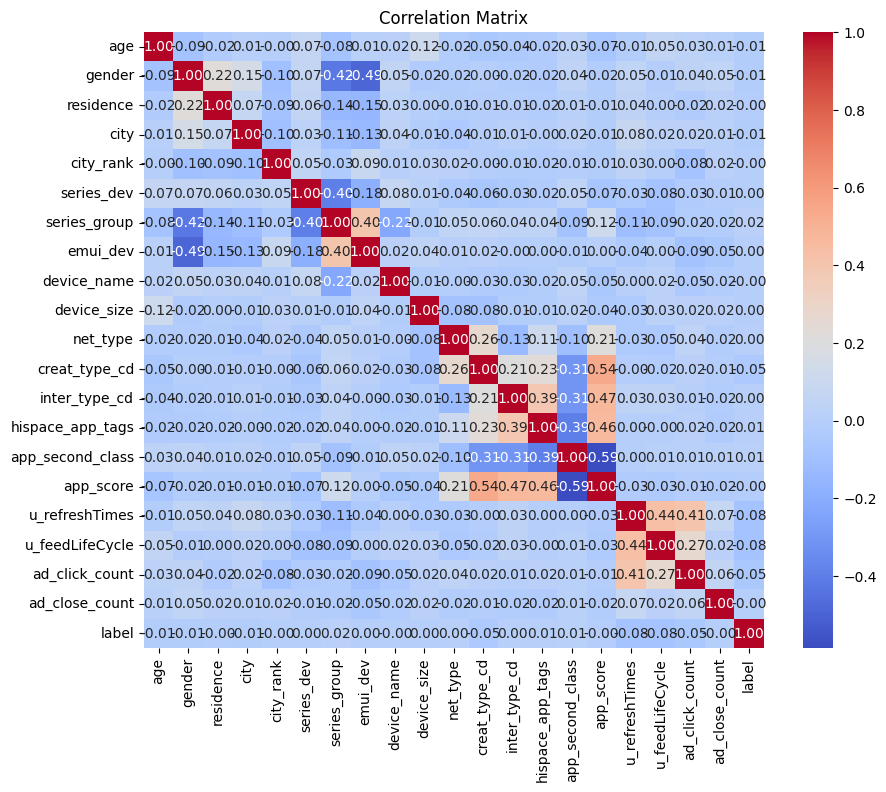

In [ ]:
# select only numerical_features
numerical_features = ['age', 'gender', 'residence', 'city', 'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name', 'device_size',
                      'net_type', 'creat_type_cd', 'inter_type_cd', 'hispace_app_tags', 'app_second_class', 'app_score', 'u_refreshTimes', 'u_feedLifeCycle', 'ad_click_count','ad_close_count']

#df_numerical = df_train[numerical_features]
#correlation_matrix = df_numerical.corr()
#correlation_matrix = df_train[numerical_features].corr()

#combine X_train and y_train data into df_numerical
df_numerical=X_train[numerical_features]
df_numerical['label']=y_train

#calculate correlation matrix and draw heatmap plot
correlation_matrix = df_numerical.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Extract correlation of each feature with 'label'
label_correlation = correlation_matrix['label'].sort_values(ascending=False)

# Display results
print(label_correlation)

label               1.000000
series_group        0.018402
app_second_class    0.008151
hispace_app_tags    0.004904
inter_type_cd       0.004903
net_type            0.000757
app_score           0.000553
emui_dev            0.000279
residence           0.000061
ad_close_count     -0.000383
series_dev         -0.001206
device_name        -0.001282
gender             -0.002638
device_size        -0.003430
city               -0.004560
city_rank          -0.006856
age                -0.011674
creat_type_cd      -0.042241
ad_click_count     -0.060838
u_feedLifeCycle    -0.084337
u_refreshTimes     -0.090126
Name: label, dtype: float64


In [ ]:
#select only data to train our model
X_train_select = X_train[['age', 'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_size', 'app_score', 'ad_click_count','ad_close_count']]
X_test_select= X_test[['age', 'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_size', 'app_score', 'ad_click_count','ad_close_count']]
#Y = train_ads['label'] ## we already separate Y from the train_ads

In [ ]:
# Get value counts for each column in X_train and X_test
for column in X_train_select.columns:
    print(f"X_train_select[{column}]:\n{X_train_select[column].value_counts()}\n")

for column in X_train_select.columns:
    print(f"X_train_select[{column}]:\n{X_train_select[column].value_counts()}\n")

# Get value counts for y_train and y_test to prove 80/20 split of data
print("y_train:\n{}\n".format(y_train.value_counts()))
print("y_test:\n{}\n".format(y_test.value_counts()))
test_ratio=y_test.value_counts()/y_train.value_counts()
train_ratio=1-test_ratio
print("spit ratio for train data:{}".format(train_ratio*100))
print("spit ratio for test data:{}".format(test_ratio*100))

X_train_select[age]:
age
8    16683
7    15811
3    15243
6     8937
5     8296
2     7331
9     1498
4     1026
Name: count, dtype: int64

X_train_select[city_rank]:
city_rank
2    31045
5    20781
4    12273
3    10726
Name: count, dtype: int64

X_train_select[series_dev]:
series_dev
16    15176
30    10839
31     9339
27     8837
11     7200
34     7108
32     5138
17     2406
21     2068
23     1921
19     1345
24      798
26      590
33      458
15      437
12      334
20      284
14      200
28      156
13       99
36       91
29        1
Name: count, dtype: int64

X_train_select[series_group]:
series_group
3    20178
5    15176
2     9982
6     9325
7     7698
8     7534
4     4932
Name: count, dtype: int64

X_train_select[emui_dev]:
emui_dev
20    13230
21    12844
11    11985
35     6497
28     6342
13     4159
29     3984
19     3610
32     3121
30     2519
23     1627
36     1168
16      999
12      558
18      535
31      500
17      408
14      259
37      228
33      192


In [ ]:
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train_select, y_train)

# Make predictions
y_pred = model.predict(X_test_select)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precison = precision_score(y_test, y_pred,zero_division=0)
recall = recall_score(y_test, y_pred,zero_division=0)
f1 = f1_score(y_test, y_pred,zero_division=0)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# print Confusion matrix and AUC
print("confusion Matrix:\n")
print(pd.DataFrame(conf_matrix,
                   columns=["Predict Down","Predict Up"],
                   index=['Actual Down','Actual Up']))
print("\nAccuracy: {:.2f}".format(accuracy))
print("\nprecison:{:.12f}".format(precison))
print("\nrecall:{:.12f}".format(recall))
print("\nf1:{:.12f}".format(f1))

confusion Matrix:

             Predict Down  Predict Up
Actual Down         51127           0
Actual Up             750           0

Accuracy: 0.99

precison:0.000000000000

recall:0.000000000000

f1:0.000000000000


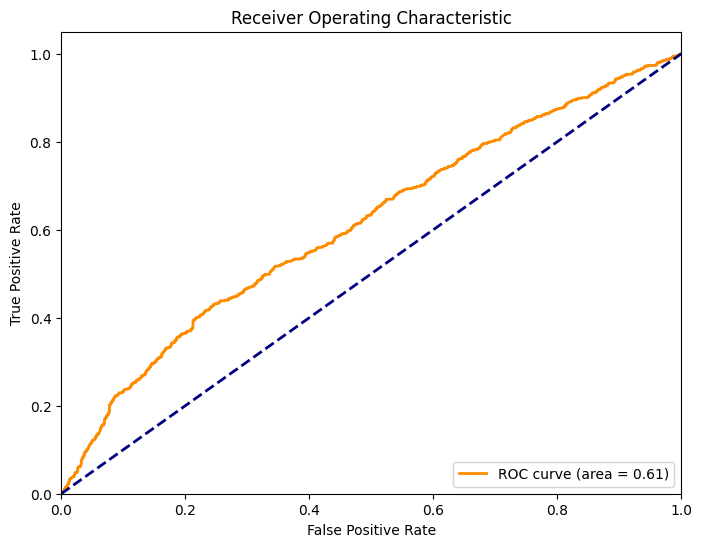

In [ ]:

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test_select)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

EDA


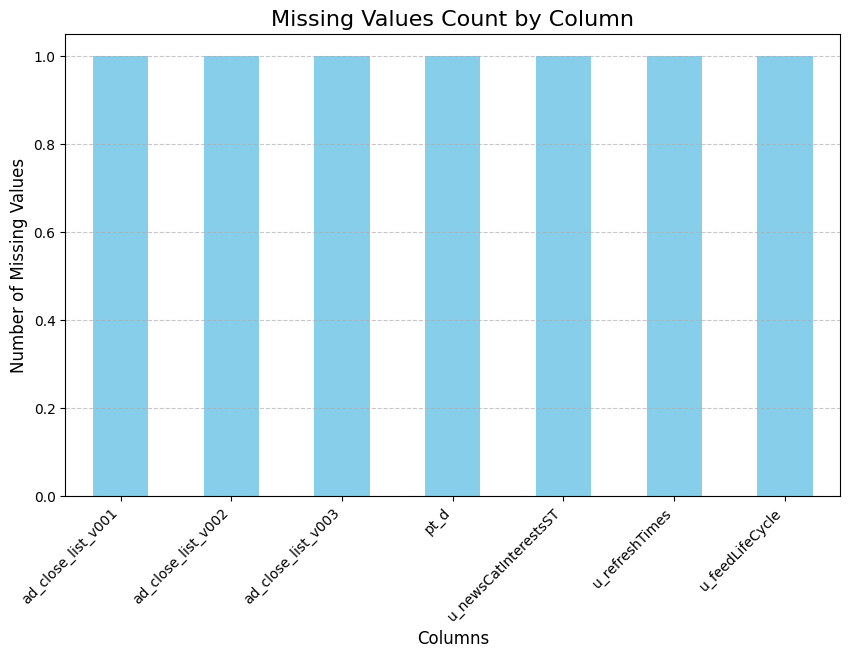

In [ ]:

missing_values = train_ads.isnull().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Plot a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count by Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This bar chart represents the number of missing values for each column in the dataset. The chart shows that only some columns have missing values, with a count of 1 missing value each.

Target Variable Distribution:
label
0    56311
1      835
Name: count, dtype: int64


<ipython-input-26-e32f98bda93f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_ads, x='label', palette='viridis')


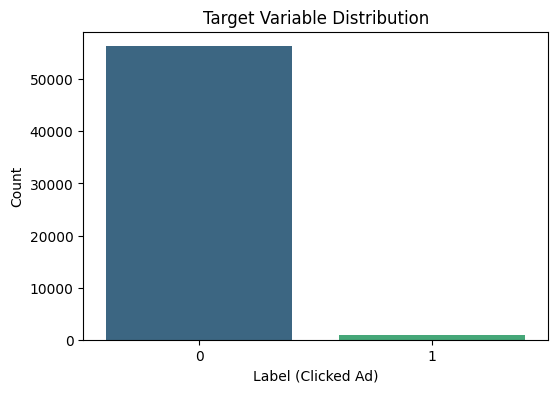

In [ ]:
#  distribution of the target variable
print("Target Variable Distribution:")
print(train_ads['label'].value_counts())

# Boxplot
plt.figure(figsize=(6, 4))
sns.countplot(data=train_ads, x='label', palette='viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Label (Clicked Ad)')
plt.ylabel('Count')
plt.show()



The label column is the target variable. It indicates whether a user clicked on

---

an ad (1) or not (0). From the output and the graph there were  56,311 instances where the ad was not clicked and 835 instances where the ad was clicked.

Gender
label
0    56311
1      835
Name: count, dtype: int64


<ipython-input-27-8a3b35b5ac98>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_ads, x='gender', y='label', palette='viridis')


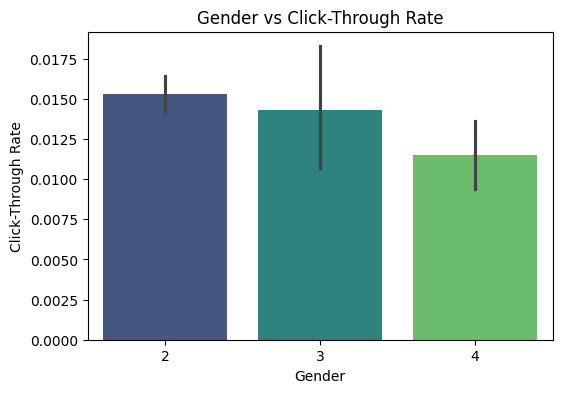

In [ ]:

# Check the distribution of the target variable
print("Gender")
print(train_ads['label'].value_counts())

plt.figure(figsize=(6, 4))
sns.barplot(data=train_ads, x='gender', y='label', palette='viridis')
plt.title('Gender vs Click-Through Rate')
plt.xlabel('Gender')
plt.ylabel('Click-Through Rate')
plt.show()


CTR=Click Through rate by gender. Gender 2 has the highest CTR among the groups, followed by gender 3 then gender 4. Click-Through rate is the proportion of clicks compared to total observations for each gender group. The black lines represents the confidence intervals which overlap, meaning the differences in CTR between genders might not be statistically significant.

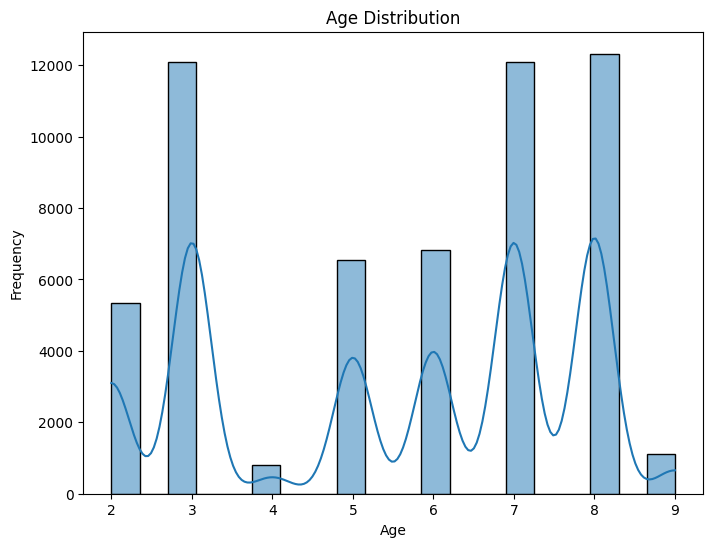

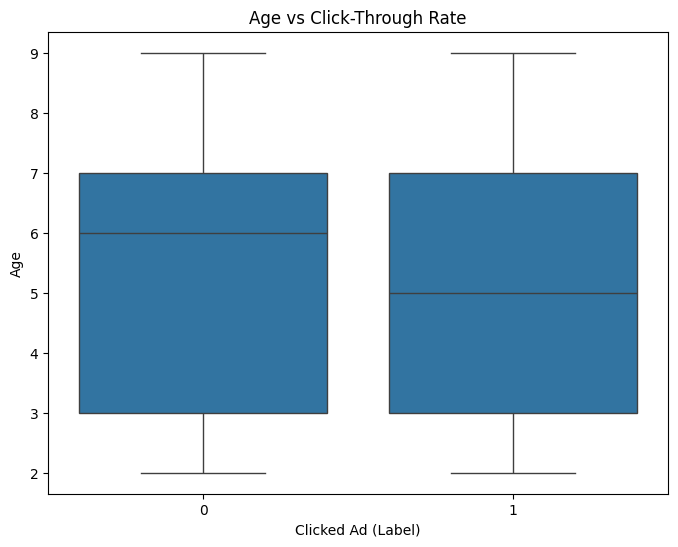

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(data=train_ads, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between 'age' and 'label'
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_ads, x='label', y='age')
plt.title('Age vs Click-Through Rate')
plt.xlabel('Clicked Ad (Label)')
plt.ylabel('Age')
plt.show()


0 represents users who did not click on the ad. 1 reprsents the users that clicked on the ad. Both groups, based on the boxplot,  (clicked and not clicked) have a median age around 6, suggesting no major difference in age distribution between the two groups. There are no visible outliers in either group, indicating that the age data is clean and uniformly distributed within the dataset. Overall, the similarity in box plot shapes, medians, and ranges suggests that age is not a strong predictor of click-through behavior when considered in isolation.

Users in the age group 8 has the highest frequency of click rates with a little more than 12,000.


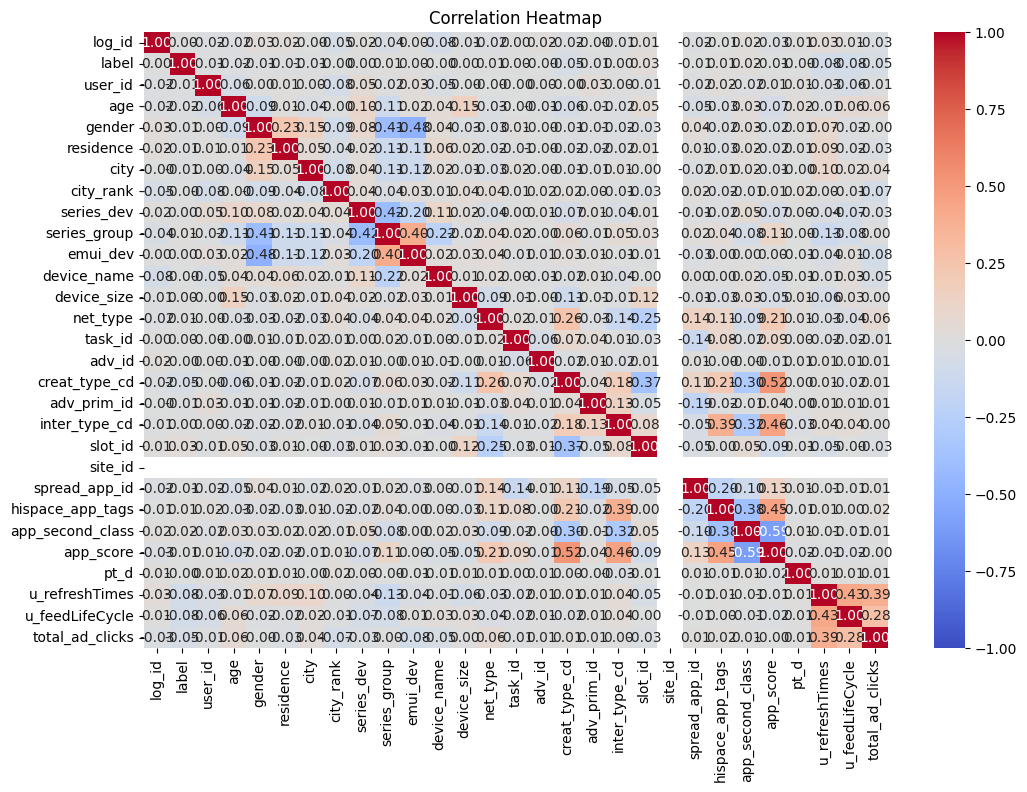

Strongly Correlated Variable Pairs:
           Variable 1 Variable 2  correlation
318     creat_type_cd  app_score     0.521344
363  app_second_class  app_score    -0.594249


In [ ]:

#only numerical columns for correlation analysis
numerical_columns = train_ads.select_dtypes(include=['number'])

#  correlation matrix
corr = numerical_columns.corr()

#  heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

correlation_threshold = 0.5  # I defined .5 or higher as strongly correlated
most_correlated = (
    corr.where(np.triu(np.ones(corr.shape), k=1) > 0)
    .stack()
    .reset_index()
    .rename(columns={0: 'correlation', 'level_0': 'Variable 1', 'level_1': 'Variable 2'})
)

strong_correlations = most_correlated[
    (most_correlated['correlation'] >= correlation_threshold) |
    (most_correlated['correlation'] <= -correlation_threshold)
]

# print most correlated variables
print("Strongly Correlated Variable Pairs:")
print(strong_correlations)




This correlation heatmap shows  the correlations between various features in the dataset, including the target variable label (ad clicks). Most features have very low or near-zero correlations with label, indicating weak linear relationships with ad click behavior. However, the relatonship between creat_type_cd and app score shows a correaltion of .521. App_second_class and app_score have a negative correlation of -.594.


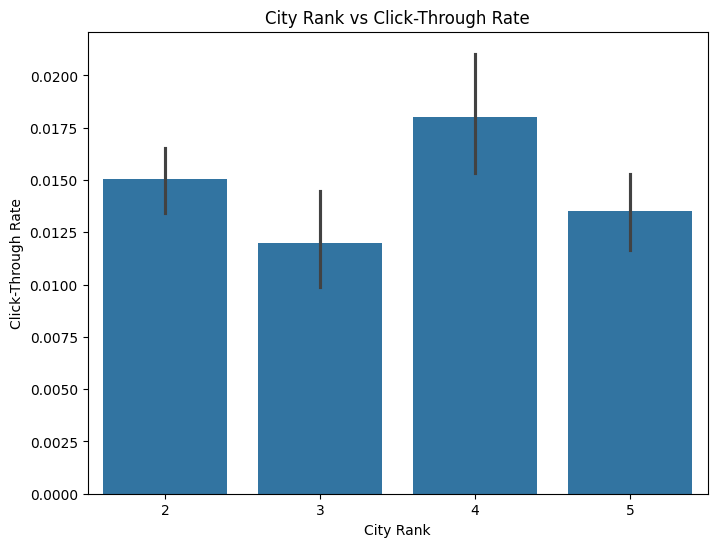

In [ ]:
# Example: City Rank vs Click-Through Rate
plt.figure(figsize=(8, 6))
sns.barplot(data=train_ads, x='city_rank', y='label')
plt.title('City Rank vs Click-Through Rate')
plt.xlabel('City Rank')
plt.ylabel('Click-Through Rate')
plt.show()


The bar graph shows the relationship between city rank and the click-through rate (CTR), represented by the target variable label. The city rank is categorized into groups (2, 3, 4, 5). The highest click-through rate is observed for cities ranked as 4, indicating that ads may perform better in cities of this rank. Cities ranked 2 and 5 have similar CTRs, which are slightly lower than that of rank 4, while rank 3 shows the lowest CTR. Overall,the result suggests that city rank is a factor that influences the CTR.